In [2]:
import numpy as np
from pylab import imshow, show
from timeit import default_timer as timer

In [6]:
def mandel(x, y, max_iters):
    c = complex(x, y)
    z = 0.0j
    
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i
        
    return max_iters

In [7]:
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]
    
    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

Mandelbrot created in 5.907895776477414


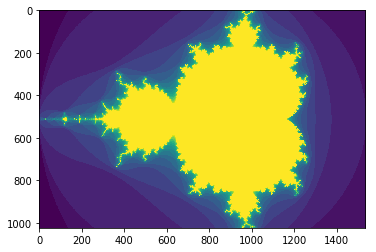

In [10]:
image = np.zeros((1024, 1536), dtype = np.uint8)
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 
dt = timer() - start

print("Mandelbrot created in", dt)
imshow(image)
show()

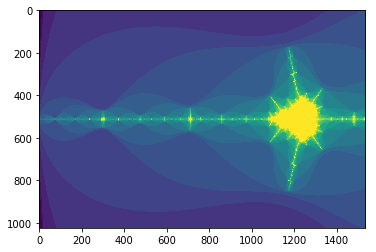

In [11]:
create_fractal(-2.0, -1.7, -0.1, 0.1, image, 20) 
imshow(image)
show()

In [13]:
from numba import autojit

@autojit
def mandel(x, y, max_iters):
    c = complex(x, y)
    z = 0.0j
    
    for i in range(max_iters):
        z = z*z + c
    if (z.real*z.real + z.imag*z.imag) >= 4:
        return i
    
    return max_iters

@autojit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    
    height = image.shape[0]
    width = image.shape[1]
    
    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

Mandelbrot created in 1.1036115724550655


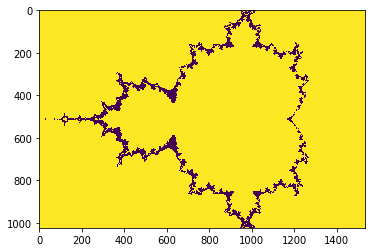

In [15]:
image = np.zeros((1024, 1536), dtype = np.uint8)
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 
dt = timer() - start

print("Mandelbrot created in", dt)
imshow(image)
show()

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time
%matplotlib inline

def get_times(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(1,50000, 150)

    for size in matrix_sizes:
        
        print('size: ', size)
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)


            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes


device_times, matrix_sizes = get_times(1.5)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

size:  1
####### Calculating on the /gpu:0 #######
[[0.02124]]
{'/gpu:0': [0.016042232513427734], '/cpu:0': []}
####### Calculating on the /cpu:0 #######
[[0.677]]
{'/gpu:0': [0.016042232513427734], '/cpu:0': [0.018526792526245117]}
size:  151
####### Calculating on the /gpu:0 #######
[[38.72 39.84 39.72 ... 40.   34.8  36.2 ]
 [40.16 42.34 40.16 ... 39.75 36.8  40.28]
 [34.4  35.44 37.03 ... 36.6  31.86 33.1 ]
 ...
 [37.53 38.6  40.4  ... 40.03 37.   37.  ]
 [36.25 38.94 38.5  ... 39.8  36.3  36.47]
 [39.03 40.66 38.94 ... 41.06 36.97 37.75]]
{'/gpu:0': [0.016042232513427734, 0.017042160034179688], '/cpu:0': [0.018526792526245117]}
####### Calculating on the /cpu:0 #######
[[38.84 30.61 33.25 ... 37.28 38.97 38.5 ]
 [41.62 35.4  35.94 ... 40.97 40.75 37.66]
 [42.   33.9  36.34 ... 42.38 40.16 40.2 ]
 ...
 [34.53 28.95 28.02 ... 36.38 34.94 33.84]
 [39.12 32.84 32.62 ... 39.5  38.5  36.75]
 [40.78 33.94 35.34 ... 40.56 39.97 40.7 ]]
{'/gpu:0': [0.016042232513427734, 0.01704216003417968

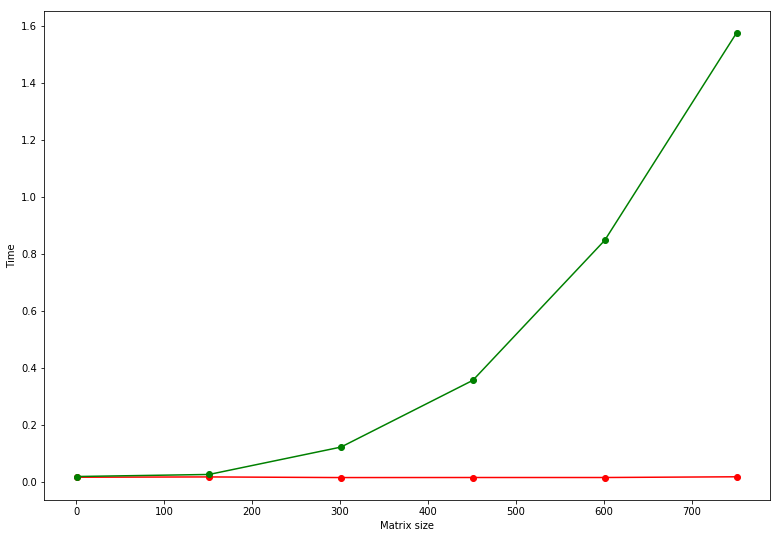

In [6]:
figure = plt.figure(figsize=(13,9))
plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-', color='red')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-', color='green')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()

In [26]:
import numpy as np
from numba import vectorize

@vectorize(['float32(float32, float32)'], target='cuda')
def Add(a, b):
    return a + b

# Initialize arrays
N = 1000000
A = np.ones(N, dtype=np.float32)
B = np.ones(A.shape, dtype=A.dtype)
C = np.empty_like(A, dtype=A.dtype)

# Add arrays on GPU
C = Add(A, B)
